# Graph Visualization Notebook
This notebook is used to visualize the graph instances, and to test reading graph instances from the files.

In [1]:
import os
import sys
current_directory = os.getcwd().replace('notebooks', '')
sys.path.append(current_directory)

In [2]:
from utils.graph_plotter import plot_graph
from utils.graph_reader import read_graph_instance, read_rakaj_graph_instance

In [3]:
dim_path = "../instances/test_instances/"
instances = os.listdir(os.path.abspath(dim_path))
instances

['instance_05_06.txt',
 'instance_05_08.txt',
 'instance_05_10.txt',
 'instance_05_13.txt']

../instances/test_instances/instance_05_06.txt
{1: 10, 2: 25, 3: 35, 4: 45, 5: 43} [(1, 3), (1, 5), (2, 5), (4, 1), (5, 4)]


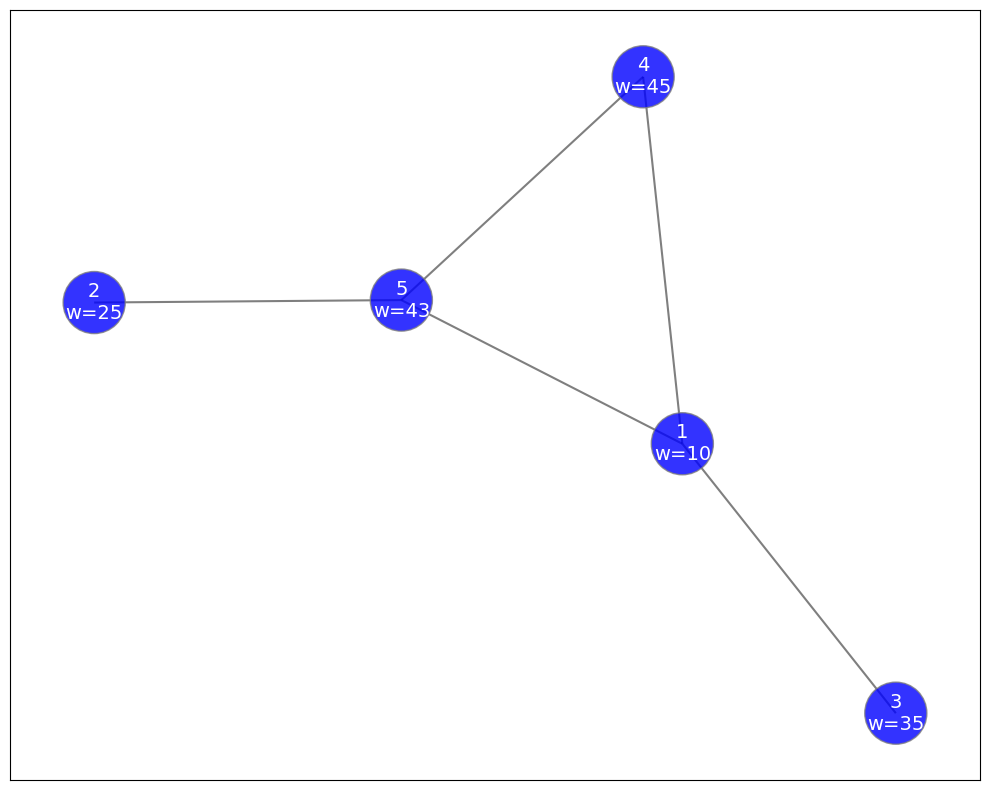

../instances/test_instances/instance_05_08.txt
{1: 48, 2: 66, 3: 56, 4: 51, 5: 42} [(1, 4), (1, 5), (2, 3), (3, 4), (3, 5), (5, 4)]


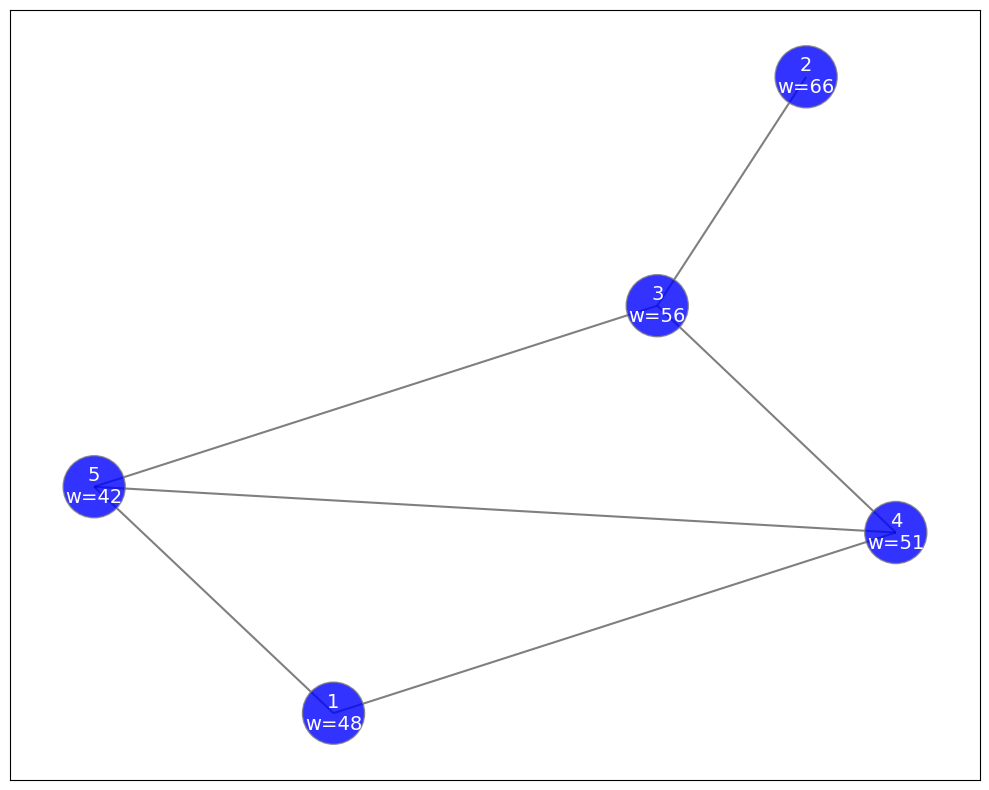

../instances/test_instances/instance_05_10.txt
{1: 28, 2: 26, 3: 53, 4: 61, 5: 44} [(1, 5), (2, 3), (2, 5), (3, 1), (3, 4), (3, 5), (4, 2), (4, 5)]


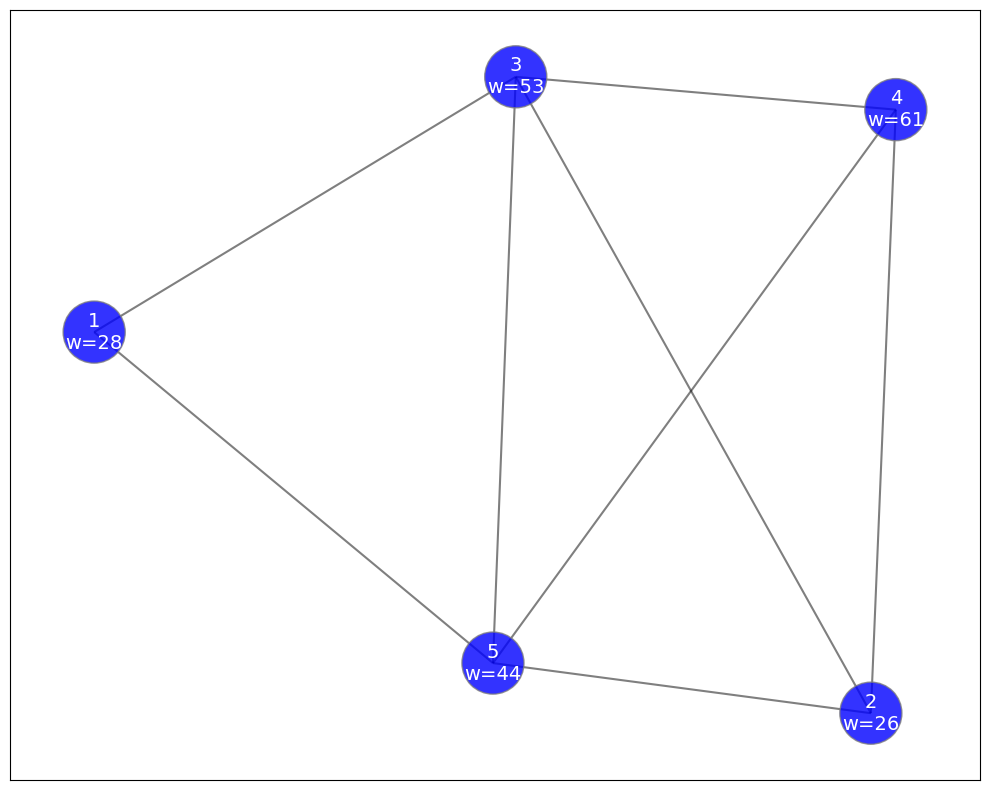

../instances/test_instances/instance_05_13.txt
{1: 62, 2: 67, 3: 39, 4: 41, 5: 30} [(1, 2), (2, 3), (2, 4), (2, 5), (3, 1), (3, 5), (4, 1), (4, 3), (4, 5)]


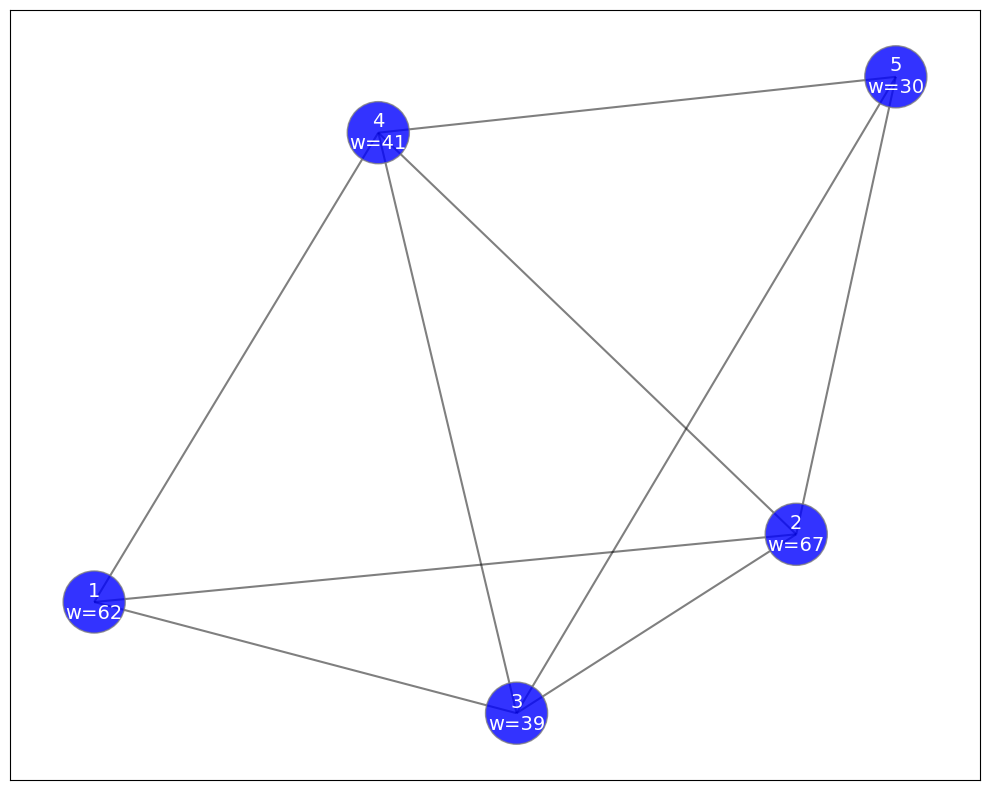

In [4]:
for instance in instances:
    instance_path = os.path.join(dim_path, instance)
    print(instance_path)
    graph_v, graph_e = read_graph_instance(instance_path)
    print(graph_v, graph_e)
    plot_graph(graph_v, graph_e, [], "")

### Rakaj instances - testing function for reading data from file

../instances/rakaj1/Problem.dat_50_100_1
{0: 41, 1: 44, 2: 43, 3: 36, 4: 26, 5: 36, 6: 47, 7: 33, 8: 49, 9: 28, 10: 28, 11: 34, 12: 38, 13: 34, 14: 49, 15: 20, 16: 45, 17: 49, 18: 40, 19: 29, 20: 44, 21: 45, 22: 49, 23: 20, 24: 40, 25: 35, 26: 48, 27: 40, 28: 36, 29: 22, 30: 25, 31: 33, 32: 28, 33: 49, 34: 39, 35: 42, 36: 20, 37: 31, 38: 30, 39: 48, 40: 35, 41: 41, 42: 23, 43: 28, 44: 47, 45: 43, 46: 30, 47: 33, 48: 24, 49: 26} [(0, 18), (0, 44), (1, 3), (1, 12), (2, 26), (2, 33), (2, 40), (3, 9), (3, 13), (3, 35), (3, 42), (3, 45), (4, 33), (4, 34), (4, 41), (4, 45), (5, 7), (5, 15), (5, 23), (5, 37), (5, 40), (6, 26), (6, 34), (6, 41), (6, 45), (7, 11), (7, 24), (7, 37), (8, 9), (8, 31), (8, 32), (8, 38), (9, 23), (9, 30), (9, 41), (9, 43), (10, 31), (10, 41), (10, 43), (11, 30), (11, 41), (11, 46), (12, 30), (12, 42), (13, 22), (13, 29), (14, 16), (14, 24), (14, 25), (14, 30), (14, 35), (14, 46), (14, 49), (15, 40), (16, 19), (16, 27), (17, 20), (17, 36), (18, 21), (18, 49), (19, 25

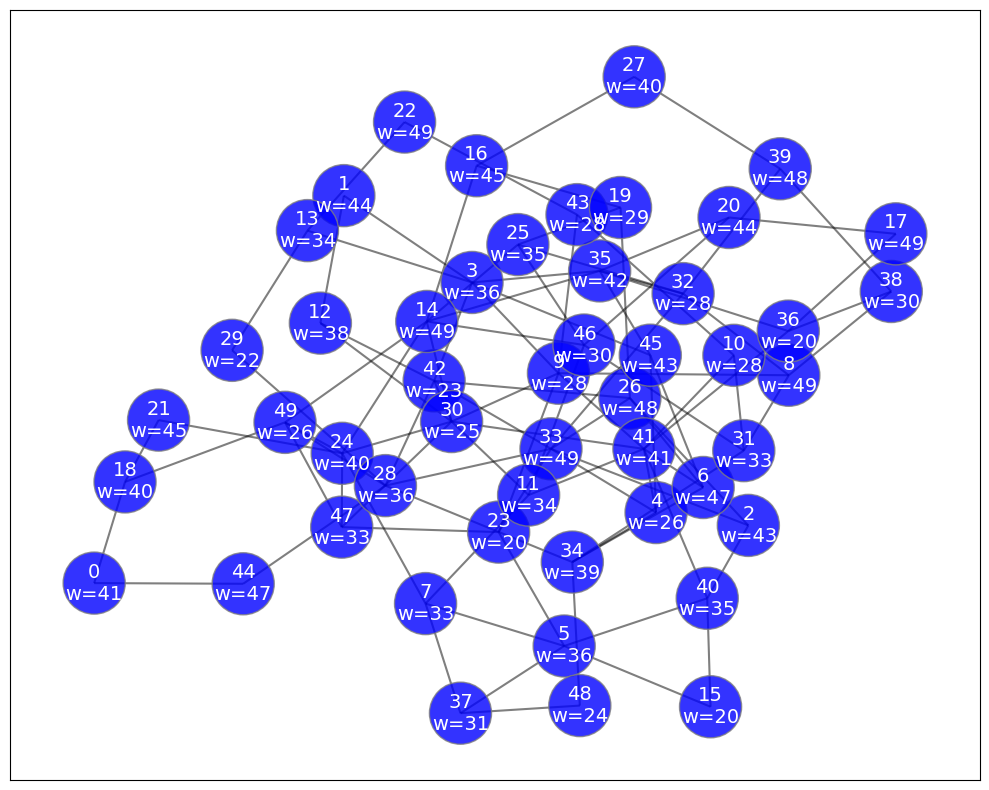

In [13]:
print(instances[5])
graph_v, graph_e = read_rakaj_graph_instance("../instances/rakaj1/Problem.dat_50_100_0")
print(graph_v, graph_e)
plot_graph(graph_v, graph_e, [], "")